In [2]:
import pandas as pd
import numpy as np
import psycopg2 as pg 

In [10]:
participant = pd.read_csv(r'D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\participants.tsv' , sep='\t')

participant

,participant_id,Gender,Age,SessionOrder,EEG_SamplingTime_Open_NS,EEG_SamplingTime_Closed_NS,EEG_SamplingTime_Open_SD,EEG_SamplingTime_Closed_SD,PVT_SamplingTime_NS,PVT_SamplingTime_SD,...,EQ,Buss_Perry,PSQI_GlobalScore,PSQI_item1,PSQI_item2,PSQI_item3,PSQI_item4,PSQI_item5,PSQI_item6,PSQI_item7
0,sub-01,M,22,NS->SD,8:57:52,9:04:40,8:18:28,8:25:34,9:27:23,9:23:08,...,NaN,NaN,4.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0
1,sub-02,M,21,NS->SD,9:47:46,9:53:24,8:54:10,8:59:50,10:16:59,10:00:47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub-03,F,19,NS->SD,8:49:46,8:55:38,9:58:36,10:04:08,8:45:04,9:34:13,...,NaN,NaN,7.0,2.0,1.0,0.0,1.0,2.0,0.0,1.0
3,sub-04,M,22,NS->SD,9:53:56,9:59:34,9:07:02,9:12:26,10:05:35,10:06:28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub-05,F,18,NS->SD,20:37:12,20:47:34,9:09:00,9:14:34,21:01:57,10:07:33,...,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,sub-67,F,21,SD->NS,14:55:42,NaN,13:23:23,NaN,NaN,NaN,...,21.0,60.0,6.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0
67,sub-68,F,21,SD->NS,17:04:59,NaN,15:02:13,NaN,NaN,NaN,...,36.0,64.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
68,sub-69,F,18,NS->SD,17:12:49,NaN,14:18:55,NaN,NaN,NaN,...,33.0,46.0,6.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0
69,sub-70,M,19,NS->SD,10:38:22,NaN,9:47:22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
participant_id = participant['participant_id']

session_order = participant['SessionOrder']

for i in range(len(session_order)):
    print(session_order[i].split('->'))

# for i in range(len(participant_id)):
#     print(participant_id[i])

['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['NS', 'SD']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['SD', 'NS']
['NS', 'SD']
['SD', 'NS']
['NS', 'SD']
['SD', 'NS']
['SD', 'NS']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['SD', 'NS']
['SD', 'NS']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['SD', 'NS']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['SD', 'NS']
['NS', 'SD']
['SD', 'NS']
['SD', 'NS']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']


In [59]:
conn = pg.connect(
    host="localhost",
    database="eeg",
    user="admin",
    password="admin123",
    port=5432
)

cur = conn.cursor()

# Define Function 

In [111]:
def insert_eeg_data(participant_id, session_order):
    seslist = ['ses-1', 'ses-2']
    eye_stateList = ['eyesclosed', 'eyesopen']

    for i_ses in range(len(seslist)):
        ses = seslist[i_ses]
        for i_eye in range(len(eye_stateList)):
            eye_state = eye_stateList[i_eye]
            
            # Skip eyeclosed state if participant_id is greater than sub-39
            if int(participant_id.split('-')[1]) >= 39 and eye_state == 'eyesclosed':
                continue
            
            filePath = rf'D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\{participant_id}\{ses}\eeg\{participant_id}_{ses}_task-{eye_state}_eeg.set'
            try:
                raw = mne.io.read_raw_eeglab(filePath)
                eegData = raw.get_data()
                ch_names = raw.ch_names

                sleep_state = 'good sleep' if session_order[i_ses] == 'NS' else 'bad sleep'
                for ch in range(len(ch_names)):
                    name = ch_names[ch].lower()
                    data = sum(eegData[ch])/len(eegData[ch])
                    sqlinsert = f"INSERT INTO eeg_data (participant_id,status_eye,sleep_status,{name}) VALUES ('{participant_id}', '{eye_state}','{sleep_state}' , {data})"
                    sqlUpdate = f"UPDATE eeg_data SET {name} = {data} WHERE participant_id = '{participant_id}' AND status_eye = '{eye_state}' AND sleep_status = '{sleep_state}'"
                    
                    if ch == 0:
                        cur.execute(sqlinsert)
                        conn.commit()
                    else:
                        cur.execute(sqlUpdate)
                        conn.commit()

                time.sleep(1)
            except RuntimeError as e:
                print(f"Error loading {filePath}: {e}")

In [112]:
for i in range(len(participant_id)):
    insert_eeg_data(participant_id[i], session_order[i].split('->'))

Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-01\ses-1\eeg\sub-01_ses-1_task-eyesclosed_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-01\ses-1\eeg\sub-01_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-01\ses-2\eeg\sub-01_ses-2_task-eyesclosed_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-01\ses-2\eeg\sub-01_ses-2_task-eyesopen_eeg.fdt
Error loading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-01\ses-2\eeg\sub-01_ses-2_task-eyesopen_eeg.set: Incorrect number of samples (6951331 != 9150000), please report this error to MNE-Python developers
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-02\ses-1\eeg\sub-02_ses-1_task-eyesclosed_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-02\ses-1\eeg\sub-02_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-02\ses-2\eeg\sub-02_ses-2_task-eyesclosed_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds00490

C:\Users\koonf\AppData\Local\Temp\ipykernel_40952\1357265523.py:16: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-47\ses-1\eeg\sub-47_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-47\ses-2\eeg\sub-47_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-48\ses-1\eeg\sub-48_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-48\ses-2\eeg\sub-48_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-49\ses-1\eeg\sub-49_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-49\ses-2\eeg\sub-49_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-50\ses-1\eeg\sub-50_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-50\ses-2\eeg\sub-50_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-51\ses-1\eeg\sub-51_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\su

C:\Users\koonf\AppData\Local\Temp\ipykernel_40952\1357265523.py:16: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-52\ses-1\eeg\sub-52_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-52\ses-2\eeg\sub-52_ses-2_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_40952\1357265523.py:16: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-53\ses-1\eeg\sub-53_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-53\ses-2\eeg\sub-53_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-54\ses-1\eeg\sub-54_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-54\ses-2\eeg\sub-54_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-55\ses-1\eeg\sub-55_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-55\ses-2\eeg\sub-55_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-56\ses-1\eeg\sub-56_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-56\ses-2\eeg\sub-56_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-57\ses-1\eeg\sub-57_ses-1_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_40952\1357265523.py:16: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filePath)
C:\Users\koonf\AppData\Local\Temp\ipykernel_40952\1357265523.py:16: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-57\ses-2\eeg\sub-57_ses-2_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_40952\1357265523.py:16: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-58\ses-1\eeg\sub-58_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-58\ses-2\eeg\sub-58_ses-2_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_40952\1357265523.py:16: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-59\ses-1\eeg\sub-59_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-59\ses-2\eeg\sub-59_ses-2_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_40952\1357265523.py:16: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-60\ses-1\eeg\sub-60_ses-1_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_40952\1357265523.py:16: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-60\ses-2\eeg\sub-60_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-61\ses-1\eeg\sub-61_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-61\ses-2\eeg\sub-61_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-62\ses-1\eeg\sub-62_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-62\ses-2\eeg\sub-62_ses-2_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_40952\1357265523.py:16: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-63\ses-1\eeg\sub-63_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-63\ses-2\eeg\sub-63_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-64\ses-1\eeg\sub-64_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-64\ses-2\eeg\sub-64_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-65\ses-1\eeg\sub-65_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-65\ses-2\eeg\sub-65_ses-2_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_40952\1357265523.py:16: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-66\ses-1\eeg\sub-66_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-66\ses-2\eeg\sub-66_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-67\ses-1\eeg\sub-67_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-67\ses-2\eeg\sub-67_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-68\ses-1\eeg\sub-68_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-68\ses-2\eeg\sub-68_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-69\ses-1\eeg\sub-69_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-69\ses-2\eeg\sub-69_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-70\ses-1\eeg\sub-70_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\su

In [ ]:
eeg_data = pd.read_sql_query("SELECT * FROM eeg_data WHERE status_eye = 'eyesclosed';", conn)

mergedf = pd.merge(participant, eeg_data, on='participant_id')


mergedf.to_csv(r'D:\Work\DSDE\Notebook\merged_data.csv', index=False)

C:\Users\koonf\AppData\Local\Temp\ipykernel_40952\3483698304.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  eeg_data = pd.read_sql_query("SELECT * FROM eeg_data WHERE status_eye = 'eyesopen';", conn)


# Load Data 

In [120]:
eegv2 = pd.read_csv(r'D:\Work\DSDE\Notebook\merged_data.csv')

In [121]:
eegv2.drop(columns=['participant_id', 'Gender','Age','SessionOrder','status_eye'], inplace=True)

In [123]:
eegv2['sleep_status'].value_counts()

sleep_status
good sleep    106
bad sleep     106
Name: count, dtype: int64

In [124]:
nan_per_rows = eegv2.isnull().sum(axis=1)

19


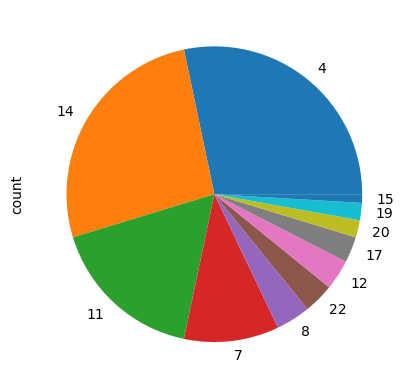

In [136]:
nan_per_rows.value_counts().plot(kind='pie')

nan_mean_values = int(nan_per_rows.value_counts().mean())
print(nan_mean_values)

In [163]:
import numpy as np
from sklearn.metrics import confusion_matrix

def custom_classification_report(y_true, y_pred, target_names, class_indices):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Initialize lists to store precision, recall, F1-score, and support for each class
    precision = []
    recall = []
    f1_score = []
    support = []

    # Calculate precision, recall, F1-score for each class
    for i in range(len(target_names)):
        true_positives = cm[i, i]
        false_positives = cm[:, i].sum() - true_positives
        false_negatives = cm[i, :].sum() - true_positives
        true_negatives = cm.sum() - (true_positives + false_positives + false_negatives)

        # Precision: TP / (TP + FP)
        if true_positives + false_positives > 0:
            precision_i = true_positives / (true_positives + false_positives)
        else:
            precision_i = 0.0

        # Recall: TP / (TP + FN)
        if true_positives + false_negatives > 0:
            recall_i = true_positives / (true_positives + false_negatives)
        else:
            recall_i = 0.0

        # F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
        if precision_i + recall_i > 0:
            f1_i = 2 * (precision_i * recall_i) / (precision_i + recall_i)
        else:
            f1_i = 0.0

        # Support: The number of true instances of each class
        support_i = cm[i, :].sum()

        # Append calculated metrics for this class
        precision.append(precision_i)
        recall.append(recall_i)
        f1_score.append(f1_i)
        support.append(support_i)

    # Calculate accuracy
    accuracy = np.trace(cm) / np.sum(cm)

    # Calculate average F1-score for specified classes
    f1_average = np.mean([f1_score[i] for i in class_indices])

    # Print the aesthetically improved report
    print("\n" + "Classification Report".center(65, "="))
    print(f"{'Class':<15}{'Precision':>12}{'Recall':>12}{'F1-Score':>12}{'Support':>12}")
    print("=" * 65)
    for i, label in enumerate(target_names):
        print(f"{label:<15}{precision[i]:>12.4f}{recall[i]:>12.4f}{f1_score[i]:>12.4f}{support[i]:>12}")
    print("=" * 65)
    print(f"Average F1-Score for classes : {f1_average:.4f}")
    print("=" * 65)

class_indices = [0, 1]

In [164]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# drop rows with missing values over nan_mean_values
# eeg_state_cleaned = eegv2.dropna(thresh=eegv2.shape[1] - nan_mean_values)
eeg_state_cleaned = eeg_data.dropna(thresh=eeg_data.shape[1]-11)



le = LabelEncoder()
eeg_state_cleaned['sleep_status'] = le.fit_transform(eeg_state_cleaned['sleep_status'])

# Convert object columns to numeric
for col in eeg_state_cleaned.columns:
    if eeg_state_cleaned[col].dtype == 'object':
        eeg_state_cleaned[col] = pd.to_numeric(eeg_state_cleaned[col], errors='coerce')

# Features and target
X = eeg_state_cleaned.drop('sleep_status', axis=1)
y = eeg_state_cleaned['sleep_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

params = {
    'objective': 'multi:softmax',
    'num_class': 2,  # Number of classes
    'learning_rate': 0.2087759602169422,
    'max_depth': 10,
    'subsample': 0.6478457734751482,
    'colsample_bytree': 0.9431214021788126,
    'device': 'cuda',  # Use GPU
    'random_state': 42,
}

train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

xgb_model = xgb.train(params, train_data,num_boost_round=462)

# Predict the class labels
y_pred = xgb_model.predict(test_data)

In [165]:
print("Expected features:", xgb_model.feature_names)
print("Dataset columns:", eeg_state_cleaned.columns.tolist())

Expected features: ['participant_id', 'status_eye', 'fp1', 'af3', 'af7', 'fz', 'f1', 'f3', 'f5', 'f7', 'fc1', 'fc3', 'fc5', 'ft7', 'cz', 'c1', 'c3', 'c5', 't7', 'cp1', 'cp3', 'cp5', 'tp7', 'tp9', 'pz', 'p1', 'p3', 'p5', 'p7', 'po3', 'po7', 'oz', 'o1', 'fpz', 'fp2', 'af4', 'af8', 'f2', 'f4', 'f6', 'f8', 'fc2', 'fc4', 'fc6', 'ft8', 'c2', 'c4', 'c6', 't8', 'cpz', 'cp2', 'cp4', 'cp6', 'tp8', 'tp10', 'p2', 'p4', 'p6', 'p8', 'poz', 'po4', 'po8', 'o2']
Dataset columns: ['participant_id', 'status_eye', 'sleep_status', 'fp1', 'af3', 'af7', 'fz', 'f1', 'f3', 'f5', 'f7', 'fc1', 'fc3', 'fc5', 'ft7', 'cz', 'c1', 'c3', 'c5', 't7', 'cp1', 'cp3', 'cp5', 'tp7', 'tp9', 'pz', 'p1', 'p3', 'p5', 'p7', 'po3', 'po7', 'oz', 'o1', 'fpz', 'fp2', 'af4', 'af8', 'f2', 'f4', 'f6', 'f8', 'fc2', 'fc4', 'fc6', 'ft8', 'c2', 'c4', 'c6', 't8', 'cpz', 'cp2', 'cp4', 'cp6', 'tp8', 'tp10', 'p2', 'p4', 'p6', 'p8', 'poz', 'po4', 'po8', 'o2']


In [166]:

target_names=list(map(str,le.classes_))

In [167]:
# Generate and print classification report
report = custom_classification_report(y_test, y_pred, target_names=target_names,class_indices = [0, 1])
print(report)



======================Classification Report======================
Class             Precision      Recall    F1-Score     Support
bad sleep            0.4375      0.5000      0.4667          14
good sleep           0.4167      0.3571      0.3846          14
Average F1-Score for classes : 0.4256
None


In [168]:
from sklearn.metrics import accuracy_score

# Predict the class labels
y_pred = xgb_model.predict(test_data)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 42.86%


In [169]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score, accuracy_score

import torch.nn as nn
import torch.optim as optim

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 55, 128)  # Adjust the input size based on the output of conv2
        self.fc2 = nn.Linear(128, 2)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Prepare the data
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CNNModel()

# Calculate the correct input size for fc1
with torch.no_grad():
    dummy_input = torch.zeros(1, 1, X_train.shape[1])
    dummy_output = model.conv1(dummy_input)
    dummy_output = model.maxpool(dummy_output)
    dummy_output = model.conv2(dummy_output)
    dummy_output = model.maxpool(dummy_output)
    fc1_input_size = dummy_output.view(dummy_output.size(0), -1).size(1)

model.fc1 = nn.Linear(fc1_input_size, 128)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(y_batch.numpy())
        y_pred.extend(predicted.numpy())

# Calculate F1 score and accuracy
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch [1/20], Loss: nan
Epoch [2/20], Loss: nan
Epoch [3/20], Loss: nan
Epoch [4/20], Loss: nan
Epoch [5/20], Loss: nan
Epoch [6/20], Loss: nan
Epoch [7/20], Loss: nan
Epoch [8/20], Loss: nan
Epoch [9/20], Loss: nan
Epoch [10/20], Loss: nan
Epoch [11/20], Loss: nan
Epoch [12/20], Loss: nan
Epoch [13/20], Loss: nan
Epoch [14/20], Loss: nan
Epoch [15/20], Loss: nan
Epoch [16/20], Loss: nan
Epoch [17/20], Loss: nan
Epoch [18/20], Loss: nan
Epoch [19/20], Loss: nan
Epoch [20/20], Loss: nan
F1 Score: 0.3333
Accuracy: 50.00%
